In [ ]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
data0 = pd.read_json('measures_0.json')
df0 = pd.DataFrame(data0['measures'])

data1 = pd.read_json('measures_1.json')
df1 = pd.DataFrame(data1['measures'])

data2 = pd.read_json('measures_2.json')
df2 = pd.DataFrame(data2['measures'])

data3 = pd.read_json('measures_3.json')
df3 = pd.DataFrame(data3['measures'])

In [ ]:
print(df0)

                                              measures
0    {'metric': 'bugs', 'value': '0', 'component': ...
1    {'metric': 'bugs', 'value': '0', 'component': ...
2    {'metric': 'bugs', 'value': '0', 'component': ...
3    {'metric': 'bugs', 'value': '0', 'component': ...
4    {'metric': 'bugs', 'value': '0', 'component': ...
..                                                 ...
801  {'metric': 'vulnerabilities', 'value': '0', 'c...
802  {'metric': 'vulnerabilities', 'value': '0', 'c...
803  {'metric': 'vulnerabilities', 'value': '0', 'c...
804  {'metric': 'vulnerabilities', 'value': '0', 'c...
805  {'metric': 'vulnerabilities', 'value': '0', 'c...

[806 rows x 1 columns]


In [ ]:
print(df1)

                                              measures
0    {'metric': 'bugs', 'value': '13', 'component':...
1    {'metric': 'bugs', 'value': '3', 'component': ...
2    {'metric': 'bugs', 'value': '2', 'component': ...
3    {'metric': 'bugs', 'value': '7', 'component': ...
4    {'metric': 'bugs', 'value': '0', 'component': ...
..                                                 ...
577  {'metric': 'vulnerabilities', 'value': '3', 'c...
578  {'metric': 'vulnerabilities', 'value': '0', 'c...
579  {'metric': 'vulnerabilities', 'value': '0', 'c...
580  {'metric': 'vulnerabilities', 'value': '0', 'c...
581  {'metric': 'vulnerabilities', 'value': '0', 'c...

[582 rows x 1 columns]


In [ ]:
print(df2)

                                              measures
0    {'metric': 'bugs', 'value': '0', 'component': ...
1    {'metric': 'bugs', 'value': '1', 'component': ...
2    {'metric': 'bugs', 'value': '0', 'component': ...
3    {'metric': 'bugs', 'value': '0', 'component': ...
4    {'metric': 'bugs', 'value': '3', 'component': ...
..                                                 ...
888  {'metric': 'vulnerabilities', 'value': '0', 'c...
889  {'metric': 'vulnerabilities', 'value': '0', 'c...
890  {'metric': 'vulnerabilities', 'value': '1', 'c...
891  {'metric': 'vulnerabilities', 'value': '0', 'c...
892  {'metric': 'vulnerabilities', 'value': '0', 'c...

[893 rows x 1 columns]


In [ ]:
print(df3)

                                              measures
0    {'metric': 'bugs', 'value': '0', 'component': ...
1    {'metric': 'bugs', 'value': '1', 'component': ...
2    {'metric': 'bugs', 'value': '1', 'component': ...
3    {'metric': 'bugs', 'value': '1', 'component': ...
4    {'metric': 'bugs', 'value': '0', 'component': ...
..                                                 ...
210  {'metric': 'vulnerabilities', 'value': '0', 'c...
211  {'metric': 'vulnerabilities', 'value': '0', 'c...
212  {'metric': 'vulnerabilities', 'value': '0', 'c...
213  {'metric': 'vulnerabilities', 'value': '0', 'c...
214  {'metric': 'vulnerabilities', 'value': '0', 'c...

[215 rows x 1 columns]


In [ ]:
df0 = pd.json_normalize(df0['measures'])
df1 = pd.json_normalize(df1['measures'])
df2 = pd.json_normalize(df2['measures'])
df3 = pd.json_normalize(df3['measures'])

In [ ]:
merged_df0 = pd.merge(df0, df1, on=['metric', 'value', 'component', 'bestValue'], how='outer')
merged_df1 = pd.merge(merged_df0, df2, on=['metric', 'value', 'component', 'bestValue'], how='outer')
merged_df = pd.merge(merged_df1, df3, on=['metric', 'value', 'component', 'bestValue'], how='outer')

In [ ]:
print(merged_df)

               metric value    component bestValue
0                bugs     0    project_1      True
1                bugs     0   project_10      True
2                bugs     0   project_11      True
3                bugs     0   project_12      True
4                bugs     0   project_14      True
...               ...   ...          ...       ...
2491  vulnerabilities     0  project_322      True
2492  vulnerabilities     0  project_324      True
2493  vulnerabilities     0  project_328      True
2494  vulnerabilities     0  project_329      True
2495  vulnerabilities     0  project_335      True

[2496 rows x 4 columns]


In [ ]:
merged_df_1 = merged_df[merged_df['metric'] == 'duplicated_lines_density']
merged_df_1.head(400)

,metric,value,component,bestValue
230,duplicated_lines_density,0.0,project_1,True
231,duplicated_lines_density,0.0,project_10,True
232,duplicated_lines_density,0.0,project_11,True
233,duplicated_lines_density,0.0,project_12,True
234,duplicated_lines_density,0.0,project_14,True
...,...,...,...,...
2355,duplicated_lines_density,0.0,project_322,True
2356,duplicated_lines_density,0.0,project_324,True
2357,duplicated_lines_density,0.0,project_328,True
2358,duplicated_lines_density,0.0,project_329,True


In [ ]:
print(merged_df.columns)

Index(['metric', 'value', 'component', 'bestValue'], dtype='object')


общее количество ошибок

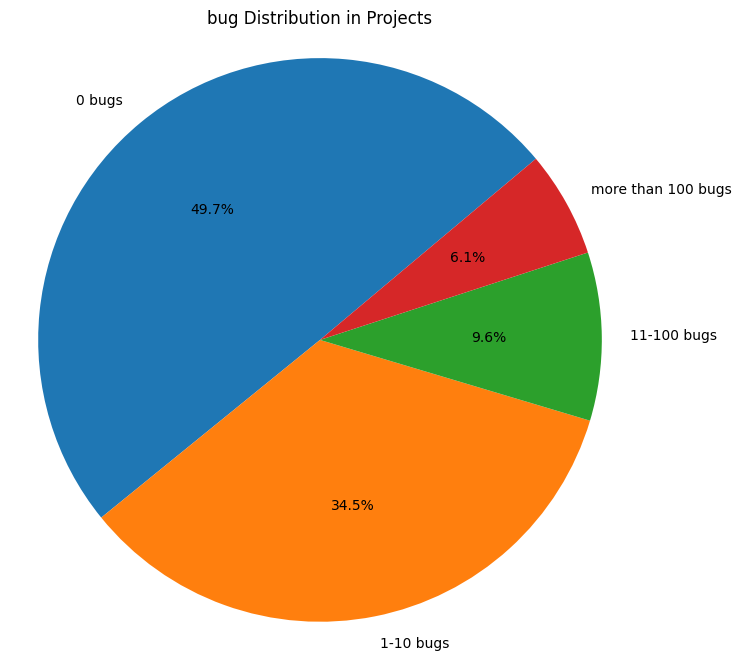

0 bugs: 98
1-10 bugs: 68
11-100 bugs: 19
more than 100 bugs: 12
Максимальное значение количества багов: 2945


In [ ]:
bugs_ranges = {
    '0 bugs': 0,
    '1-10 bugs': 0,
    '11-100 bugs': 0,
    'more than 100 bugs': 0
}

max_bug_count = 0
for index, project in merged_df.iterrows():
    if project['metric'] == 'bugs':
        bug_count = int(project['value'])
        if bug_count == 0:
            bugs_ranges['0 bugs'] += 1
        elif 1 <= bug_count <= 10:
            bugs_ranges['1-10 bugs'] += 1
        elif 11 <= bug_count <= 100:
            bugs_ranges['11-100 bugs'] += 1
        else:
            bugs_ranges['more than 100 bugs'] += 1
        max_bug_count = max(max_bug_count, bug_count)

plt.figure(figsize=(8, 8))
plt.pie(bugs_ranges.values(), labels=bugs_ranges.keys(), autopct='%1.1f%%', startangle=40)
plt.axis('equal')
plt.title('bug Distribution in Projects')
plt.show()

for key, value in bugs_ranges.items():
    print(f"{key}: {value}")


print(f"Максимальное значение количества багов: {max_bug_count}")

Примеры распространенных code smell:

1.   Длинные функции, отвечающие за слишком много задач
2.   Дублирование кода в разных местах
3.   Неправильное именование переменных, функций и классов
4.   Мертвый код, который никогда не вызывается
5.   Классы-посредники, делегирующие всю работу другим классам

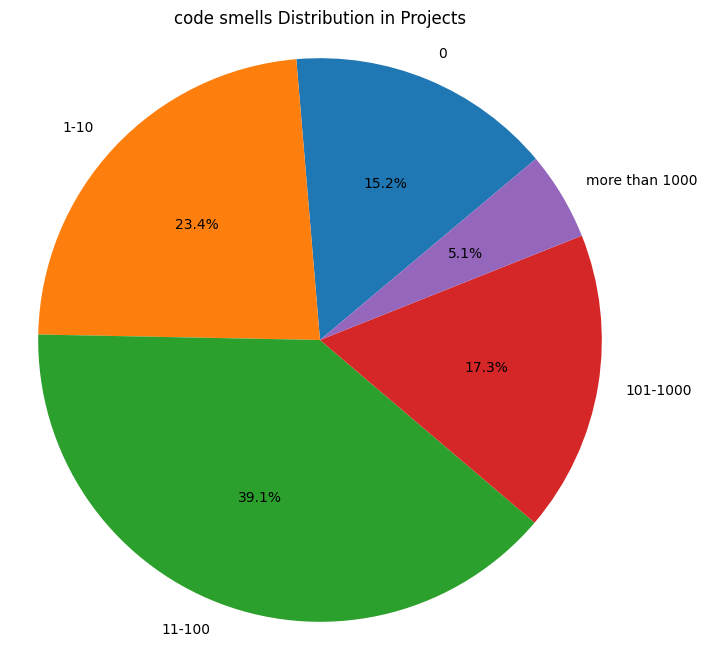

0  code smells: 30
1-10 code smells: 46
11-100 code smells: 77
101-1000 code smells: 34
more than 1000 code smells: 10
Максимальное значение количества ошибок (code smells): 26674


In [ ]:
code_smells_ranges = {
    '0 ': 0,
    '1-10': 0,
    '11-100': 0,
    '101-1000': 0,
    'more than 1000':0
}

max_code_smells = 0
for index, project in merged_df.iterrows():
    if project['metric'] == 'code_smells':
        smells_count = int(project['value'])
        if smells_count == 0:
            code_smells_ranges['0 '] += 1
        elif 1 <= smells_count <= 10:
            code_smells_ranges['1-10'] += 1
        elif 11 <= smells_count <= 100:
            code_smells_ranges['11-100'] += 1
        elif 101 <= smells_count <= 1000:
            code_smells_ranges['101-1000'] += 1
        else:
            code_smells_ranges['more than 1000'] += 1
        max_code_smells = max(max_code_smells, smells_count)


plt.figure(figsize=(8, 8))
plt.pie(code_smells_ranges.values(), labels=code_smells_ranges.keys(), autopct='%1.1f%%', startangle=40)
plt.axis('equal')
plt.title('code smells Distribution in Projects')
plt.show()


for key, value in code_smells_ranges.items():
    print(f"{key} code smells: {value}")



print(f"Максимальное значение количества ошибок (code smells): {max_code_smells}")

сложность

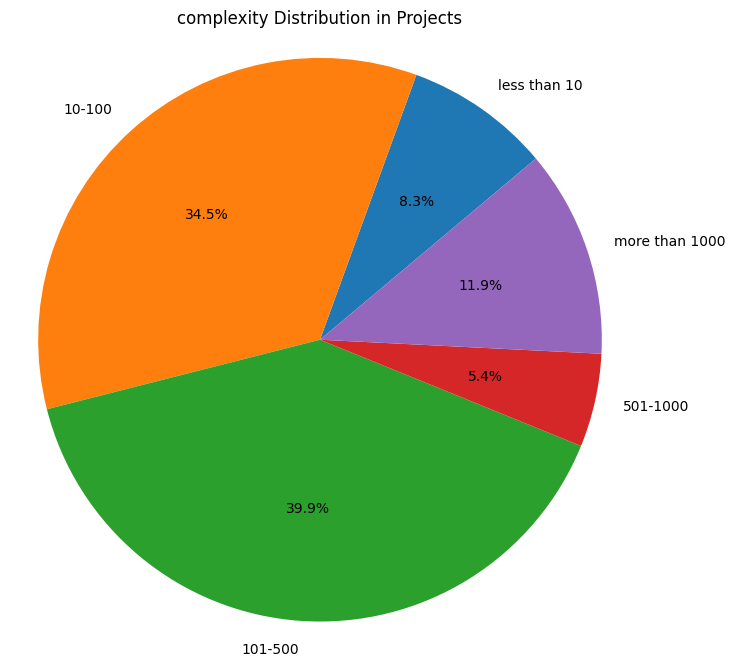

less than 10 : 14
10-100 : 58
101-500 : 67
501-1000 : 9
more than 1000 : 20
Максимальное значение сложности: 150174


In [ ]:
complexity_ranges = {
    'less than 10': 0,
    '10-100': 0,
    '101-500': 0,
    '501-1000': 0,
    'more than 1000':0
}

max_complexity = 0
for index, project in merged_df.iterrows():
    if project['metric'] == 'complexity':
        complexity_count = int(project['value'])
        if complexity_count < 10:
            complexity_ranges['less than 10'] += 1
        elif 10 <= complexity_count <= 100:
            complexity_ranges['10-100'] += 1
        elif 101 <= complexity_count <= 500:
            complexity_ranges['101-500'] += 1
        elif 501 <= complexity_count <= 1000:
            complexity_ranges['501-1000'] += 1
        else:
            complexity_ranges['more than 1000'] += 1
        max_complexity = max(max_complexity, complexity_count)


plt.figure(figsize=(8, 8))
plt.pie(complexity_ranges.values(), labels=complexity_ranges.keys(), autopct='%1.1f%%', startangle=40)
plt.axis('equal')
plt.title('complexity Distribution in Projects')
plt.show()


for key, value in complexity_ranges.items():
    print(f"{key} : {value}")



print(f"Максимальное значение сложности: {max_complexity}")

**Надежность**

* Незначительная ошибка

1.  Не влияет на основные функции приложения
2.  Не приводит к потере данных или некорректному отображению информации
3.  Не создает серьезных неудобств для пользователей
4.  Может быть исправлена в ближайшем релизе без срочной необходимости

* Серьезная ошибка
1.  Нарушает основные функции приложения, но не делает его полностью неработоспособным
2.  Может приводить к некорректному отображению данных или незначительной потере информации
3.  Создает серьезные неудобства для пользователей, но не делает приложение неиспользуемым
4.  Требует исправления в ближайшем релизе, но не является критической для выпуска
* Критическая ошибка
1.  Делает приложение полностью или частично неработоспособным
2.  Приводит к потере важных данных или некорректному отображению критической информации
3.  Делает приложение практически неиспользуемым для пользователей
4.  Требует срочного исправления и выпуска патча, так как критична для работы приложения
* Блокирующая ошибка
1.  Делает приложение полностью неработоспособным и неиспользуемым
2.  Приводит к серьезной потере данных или делает их недоступными
3.  Не позволяет пользователям выполнять какие-либо действия в приложении
4.  Требует немедленного исправления, так как блокирует всю работу с приложением

In [ ]:
reliability_ranges = {
    '0 ошибок': 0.0,
    'как минимум 1 незначительная ошибка': 0.0,
    'как минимум 1 серьезная ошибка': 0.0,
    'как минимум 1 критическая ошибка': 0.0,
    'как минимум 1 блокирующая ошибка':0.0
}

for index, project in merged_df.iterrows():
    if project['metric'] == 'reliability_rating':
        reliability_count = float(project['value'])
        if reliability_count == 1.0:
            reliability_ranges['0 ошибок'] += 1
        elif reliability_count == 2.0:
            reliability_ranges['как минимум 1 незначительная ошибка'] += 1
        elif reliability_count == 3.0:
            reliability_ranges['как минимум 1 серьезная ошибка'] += 1
        elif reliability_count == 4.0:
            reliability_ranges['как минимум 1 критическая ошибка'] += 1
        elif reliability_count == 5.0:
            reliability_ranges['как минимум 1 блокирующая ошибка'] += 1

for key, value in reliability_ranges.items():
    print(f"{key} : {int(value)}")

0 ошибок : 98
как минимум 1 незначительная ошибка : 4
как минимум 1 серьезная ошибка : 55
как минимум 1 критическая ошибка : 13
как минимум 1 блокирующая ошибка : 27


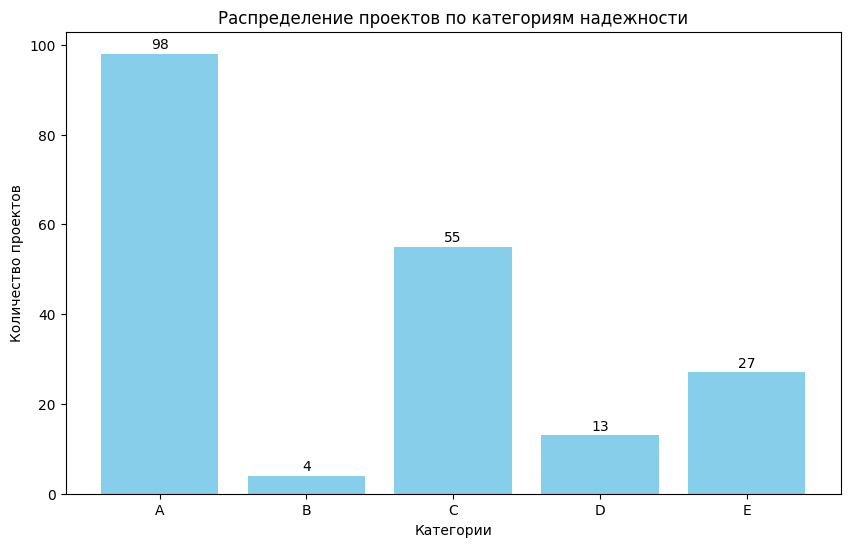

In [ ]:
categories = ['A', 'B', 'C', 'D', 'E']
values = [int(reliability_ranges['0 ошибок']),
          int(reliability_ranges['как минимум 1 незначительная ошибка']),
          int(reliability_ranges['как минимум 1 серьезная ошибка']),
          int(reliability_ranges['как минимум 1 критическая ошибка']),
          int(reliability_ranges['как минимум 1 блокирующая ошибка'])]

plt.figure(figsize=(10, 6))
plt.bar(categories, values, color='skyblue')
plt.xlabel('Категории')
plt.ylabel('Количество проектов')
plt.title('Распределение проектов по категориям надежности')
for i, value in enumerate(values):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom')

plt.show()

**Безопасность**
* Незначительная уязвимость
1. Не позволяет злоумышленнику получить доступ к конфиденциальным данным или выполнить вредоносный код
2. Не создает серьезных рисков для безопасности системы
3. Может быть исправлена в ближайшем обновлении без срочной необходимости
4. Обычно связана с незначительными ошибками в реализации или конфигурации
* Серьезная уязвимость
1. Может позволить злоумышленнику получить повышенные привилегии или доступ к чувствительной информации
2. Создает значительные риски для безопасности системы, но не делает ее полностью уязвимой
3. Требует исправления в ближайшем обновлении, но не является критической для безопасности
4. Может быть связана с ошибками аутентификации, авторизации или обработки ввода
* Критическая уязвимость
1. Позволяет злоумышленнику получить полный контроль над системой или выполнить вредоносный код
2. Создает серьезные риски для безопасности и может привести к компрометации всей системы
3. Требует срочного исправления, так как критична для безопасности
4. Может быть связана с ошибками в реализации криптографии, выполнении команд или управлении памятью
* Уязвимость блокатор
1. Делает систему полностью уязвимой и неспособной противостоять атакам
2. Позволяет злоумышленнику получить полный контроль и выполнить любой вредоносный код
3. Создает критические риски для безопасности и должна быть исправлена немедленно
4. Может быть связана с фундаментальными ошибками в дизайне или реализации системы

In [ ]:
security_ranges = {
    '0 уязвимостей': 0.0,
    'не менее 1 незначительной уязвимости': 0.0,
    'не менее 1 серьезной уязвимости': 0.0,
    'не менее 1 критической уязвимости': 0.0,
    'не менее 1 уязвимости блокатора':0.0
}

for index, project in merged_df.iterrows():
    if project['metric'] == 'security_rating':
        security_count = float(project['value'])
        if security_count == 1.0:
            security_ranges['0 уязвимостей'] += 1
        elif security_count == 2.0:
            security_ranges['не менее 1 незначительной уязвимости'] += 1
        elif security_count == 3.0:
            security_ranges['не менее 1 серьезной уязвимости'] += 1
        elif security_count == 4.0:
            security_ranges['не менее 1 критической уязвимости'] += 1
        elif security_count == 5.0:
            security_ranges['не менее 1 уязвимости блокатора'] += 1

for key, value in security_ranges.items():
    print(f"{key} : {int(value)}")

0 уязвимостей : 149
не менее 1 незначительной уязвимости : 0
не менее 1 серьезной уязвимости : 3
не менее 1 критической уязвимости : 1
не менее 1 уязвимости блокатора : 44


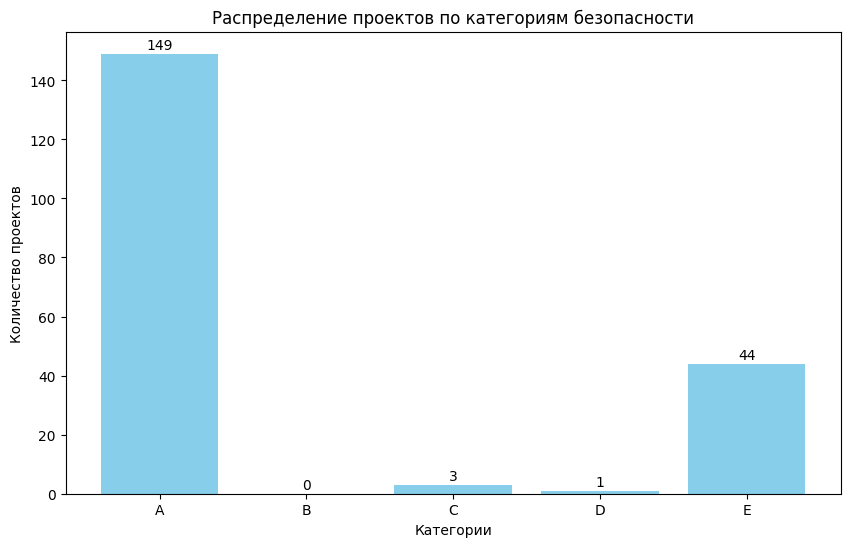

In [ ]:
categories = ['A', 'B', 'C', 'D', 'E']
values = [int(security_ranges['0 уязвимостей']),
          int(security_ranges['не менее 1 незначительной уязвимости']),
          int(security_ranges['не менее 1 серьезной уязвимости']),
          int(security_ranges['не менее 1 критической уязвимости']),
          int(security_ranges['не менее 1 уязвимости блокатора'])]

plt.figure(figsize=(10, 6))
plt.bar(categories, values, color='skyblue')
plt.xlabel('Категории')
plt.ylabel('Количество проектов')
plt.title('Распределение проектов по категориям безопасности')
for i, value in enumerate(values):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom')

plt.show()

In [ ]:
duplicated_ranges = {
    'less than 1%': 0.0,
    '1-10%': 0.0,
    '11-50%': 0.0,
    '51-80%': 0.0,
    'more than 80%':0.0
}

for index, project in merged_df.iterrows():
    if project['metric'] == 'duplicated_lines_density':
        duplicates_count = float(project['value'])
        if duplicates_count < 1:
            duplicated_ranges['less than 1%'] += 1
        elif 1 <= duplicates_count <= 10:
            duplicated_ranges['1-10%'] += 1
        elif 11 <= duplicates_count <= 50:
            duplicated_ranges['11-50%'] += 1
        elif 51 <= duplicates_count < 80:
            duplicated_ranges['51-80%'] += 1
        elif 80 <= duplicates_count :
            duplicated_ranges['more than 80%'] += 1

for key, value in duplicated_ranges.items():
    print(f"{key} : {int(value)}")

less than 1% : 127
1-10% : 51
11-50% : 13
51-80% : 2
more than 80% : 1


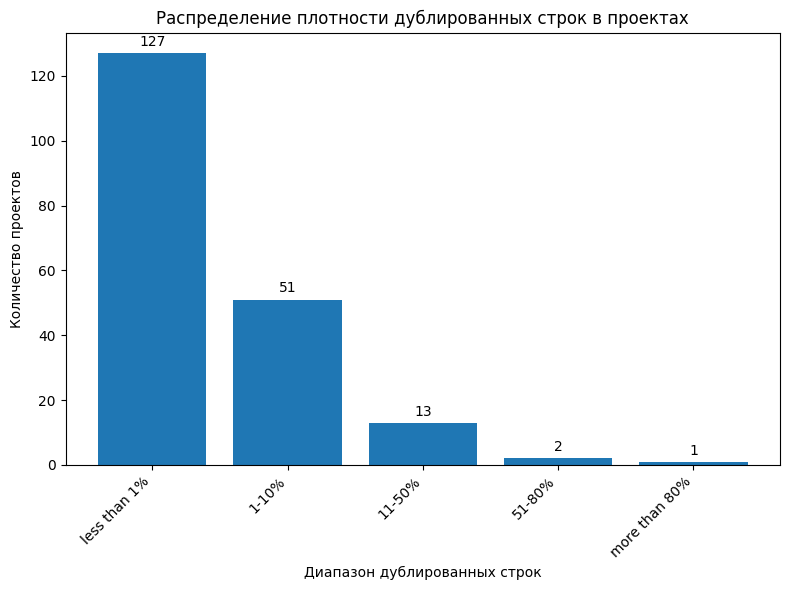

In [ ]:
plt.figure(figsize=(8, 6))
bars = plt.bar(duplicated_ranges.keys(), duplicated_ranges.values())
plt.xticks(rotation=45, ha='right')
plt.xlabel('Диапазон дублированных строк')
plt.ylabel('Количество проектов')
plt.title('Распределение плотности дублированных строк в проектах')

# Добавление количества проектов на столбцы
for bar in bars:
    height = bar.get_height()
    plt.annotate(f"{int(height)}",
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()